<a href="https://colab.research.google.com/github/JMYoon90/JM_python/blob/main/py22_seaborn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# imports

In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [19]:
tips = sns.load_dataset('tips')

In [20]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [21]:
tips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.4 KB


# Box plot

연속형 변수의 기술 통계량(최소값, 최대값, 4사분위)

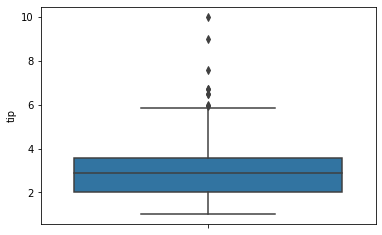

In [22]:
sns.boxplot(data=tips, y='tip')
plt.show()

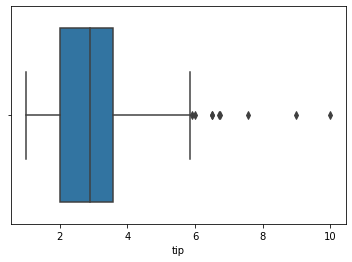

In [23]:
sns.boxplot(data=tips, x='tip')
plt.show()

성별 tip의 boxplot

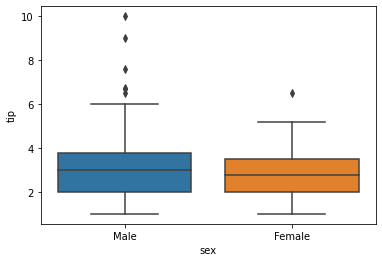

In [24]:
sns.boxplot(data=tips, y='tip', x='sex')
plt.show()

In [25]:
tips[tips.sex == 'Male'].tip.describe()

count    157.000000
mean       3.089618
std        1.489102
min        1.000000
25%        2.000000
50%        3.000000
75%        3.760000
max       10.000000
Name: tip, dtype: float64

요일별 tip의 box plot

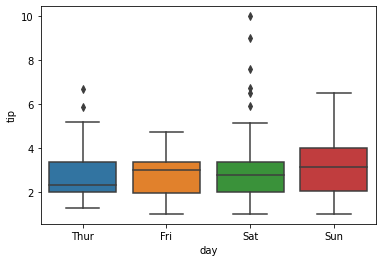

In [26]:
sns.boxplot(data=tips, x='day', y='tip')
plt.show()

* subplot을 2개 생성(1x2)
* 흡연여부별 tip의 boxplot, 시간별 tip의 boxplot

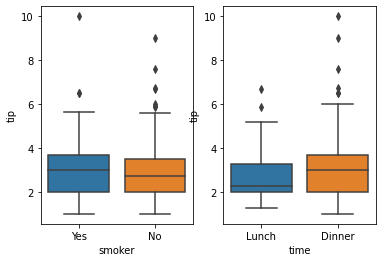

In [27]:
fig, ax = plt.subplots(ncols=2)

sns.boxplot(data=tips, x='smoker', y='tip', ax=ax[0])
sns.boxplot(data=tips, x='time', y='tip', ax=ax[1])

plt.show()

# Histogram

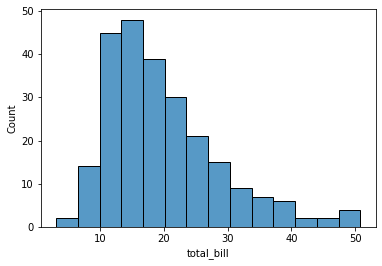

In [30]:
sns.histplot(data=tips, x='total_bill')
plt.show()

# Bar plot

## countplot

카테고리 타입 변수의 빈도수를 막대로 표현

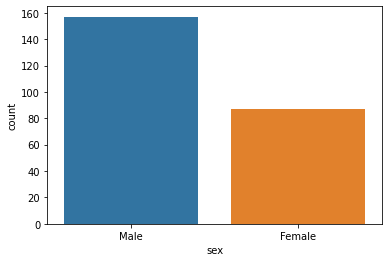

In [33]:
sns.countplot(data=tips, x='sex') # 성별 빈도수 세로 막대 그래프
plt.show()

<function matplotlib.pyplot.show(*args, **kw)>

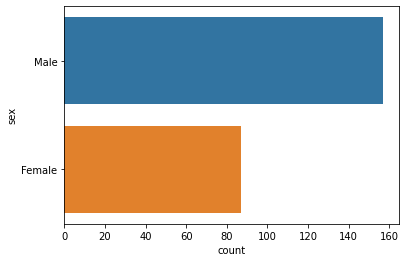

In [34]:
sns.countplot(data=tips, y='sex')
plt.show()

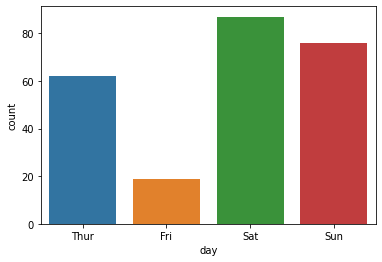

In [36]:
# 요일 빈도수
sns.countplot(data=tips, x='day')
plt.show()

In [52]:
# 요일별 성별 빈도수
tips.groupby(['day', 'sex']).tip.count()

day   sex   
Thur  Male      30
      Female    32
Fri   Male      10
      Female     9
Sat   Male      59
      Female    28
Sun   Male      58
      Female    18
Name: tip, dtype: int64

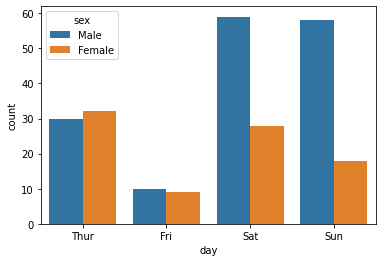

In [37]:
sns.countplot(data=tips, x='day', hue='sex')
#> param hue: 카테고리 변수 이름. 카테고리별 다르게 색깔을 사용하는 경우.
plt.show()

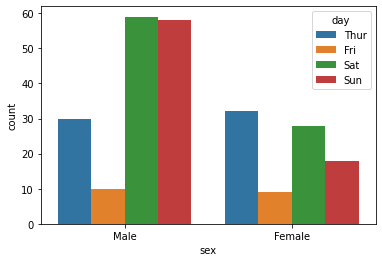

In [38]:
sns.countplot(data=tips, x='sex', hue='day')
plt.show()

성별 흡연 여부별 빈도수

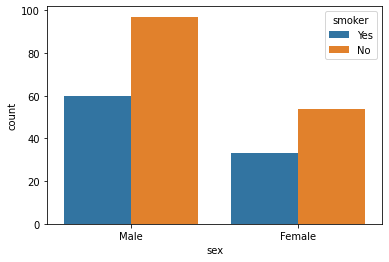

In [40]:
sns.countplot(data=tips, x='sex', hue='smoker')
plt.show()

In [41]:
tips.groupby(['sex', 'smoker']).tip.count()

sex     smoker
Male    Yes       60
        No        97
Female  Yes       33
        No        54
Name: tip, dtype: int64

## `barplot()`

* 그룹별 변수의 통계량(평균, 표준편차, 중앙값, 개수, ...)을 막대로 시각화.
* 통계량 함수의 기본값은 평균(mean).
* 카테고리 타입 변수와 연속형 변수를 함께 시각화.

In [43]:
# 성별 팁의 평균
tips.groupby('sex').tip.mean()

sex
Male      3.089618
Female    2.833448
Name: tip, dtype: float64

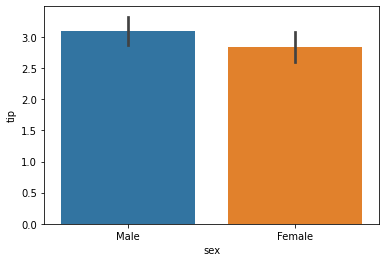

In [44]:
sns.barplot(data=tips, x='sex', y='tip') # estimator 파라미터의 기본값=np.mean
plt.show()

In [46]:
# 성별 tip의 최대값
tips.groupby('sex').tip.max()

sex
Male      10.0
Female     6.5
Name: tip, dtype: float64

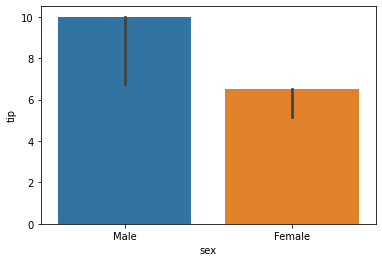

In [47]:
sns.barplot(data=tips, x='sex', y='tip', estimator=np.max)
plt.show()

In [49]:
# 성별, 흡연여부별 팁의 평균
tips.groupby(['sex', 'smoker']).tip.mean()

sex     smoker
Male    Yes       3.051167
        No        3.113402
Female  Yes       2.931515
        No        2.773519
Name: tip, dtype: float64

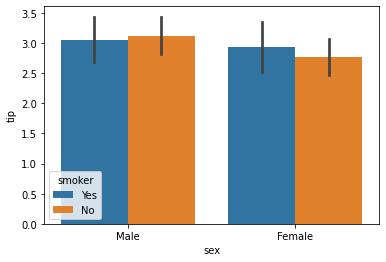

In [51]:
sns.barplot(data=tips, x='sex', y='tip', hue='smoker')
plt.show()

# Scatter plot

* `tip ~ total_bill` 산점도

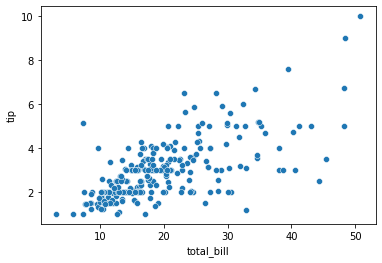

In [54]:
sns.scatterplot(x='total_bill', y='tip', data=tips)
plt.show()

* `tip ~ total_bill` 산점도
* 점의 색을 성별에 따라서 다르게 표현

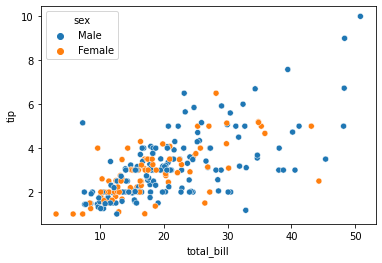

In [57]:
sns.scatterplot(x='total_bill', y='tip', data=tips, hue='sex')
plt.show()

* `tip ~ total_bill` 산점도
* 점의 색은 성별에 따라서 다르게 표현
* 점의 모양은 흡연 여부에 따라서 다르게 표현


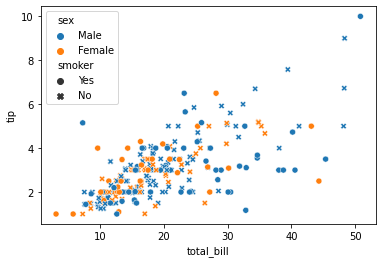

In [58]:
sns.scatterplot(x='total_bill', y='tip', data=tips, hue='sex', style='smoker')
plt.show()

* `tip ~ total_bill` 산점도
* 점의 색은 성별에 따라서 다르게 표현
* 점의 모양은 흡연 여부에 따라서 다르게 표현
* 점의 크기를 인원수에 따라서 다르게 표현

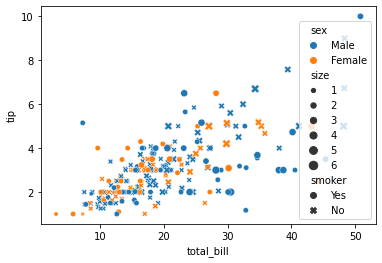

In [59]:
sns.scatterplot(x='total_bill', y='tip', data=tips, hue='sex', style='smoker', size='size')
plt.show()

# Category plot

카테고리별로 subplot들을 생성하고 통계값(평균, 중앙값, ...) 계산해서, 각각의 subplot에 같은 종류의 그래프들을 시각화.

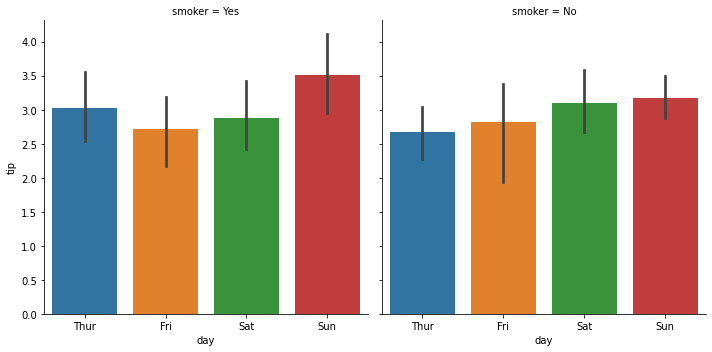

In [62]:
# 요일별 팁의 평균 막대 그래프를 흡연여부별로 subplot을 생성.
sns.catplot(data=tips, x='day', y='tip', col='smoker', kind='bar') # estimator=np.mean
plt.show()

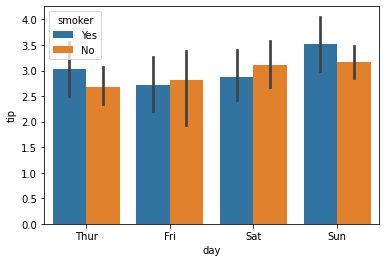

In [64]:
sns.barplot(data=tips, x='day', y='tip', hue='smoker')
plt.show()

요일별 tip의 평균 막대 그래프 + 시간별 subplot 생성

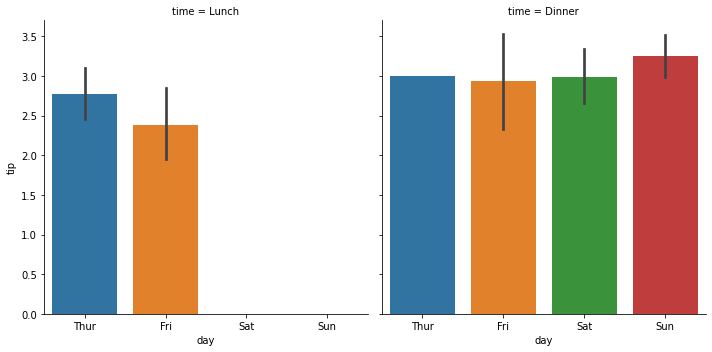

In [76]:
sns.catplot(data=tips, x='day', y='tip', col='time', kind='bar')
plt.show()

요일별 tip의 평균 막대 그래프+ 흡연여부별 subplot + 시간별 subplot 생성

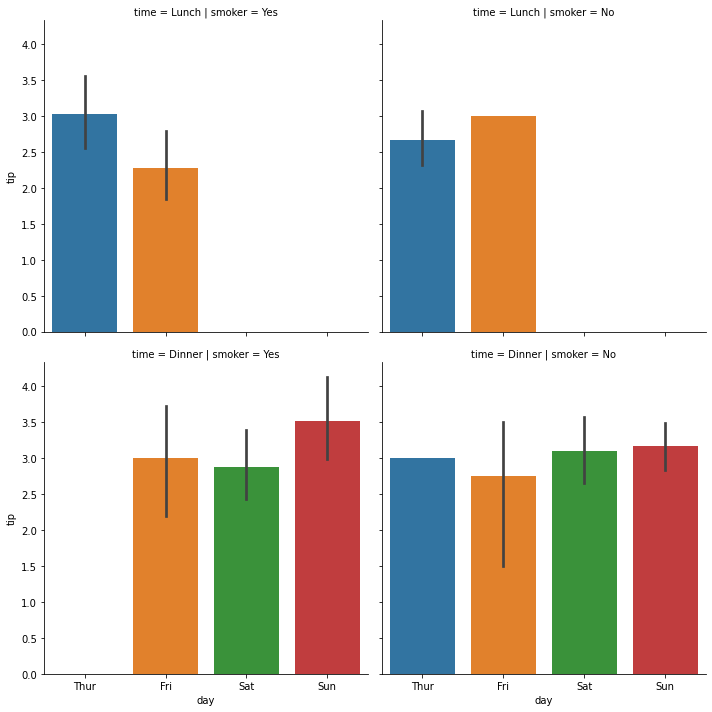

In [70]:
sns.catplot(data=tips, x='day', y='tip', col='smoker', row='time', kind='bar')
plt.show()

요일별 성별 tip의 평균 막대 그래프 + 시간별 subplot

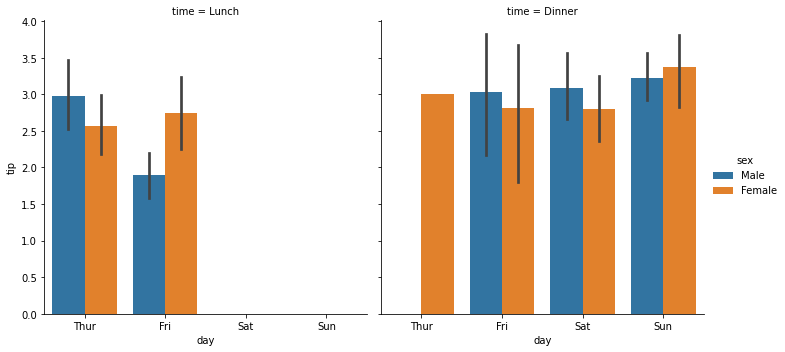

In [77]:
sns.catplot(data=tips, x='day', y='tip', hue='sex', col='time', kind='bar')
plt.show()

성별 tip의 box plot + 요일별 subplot

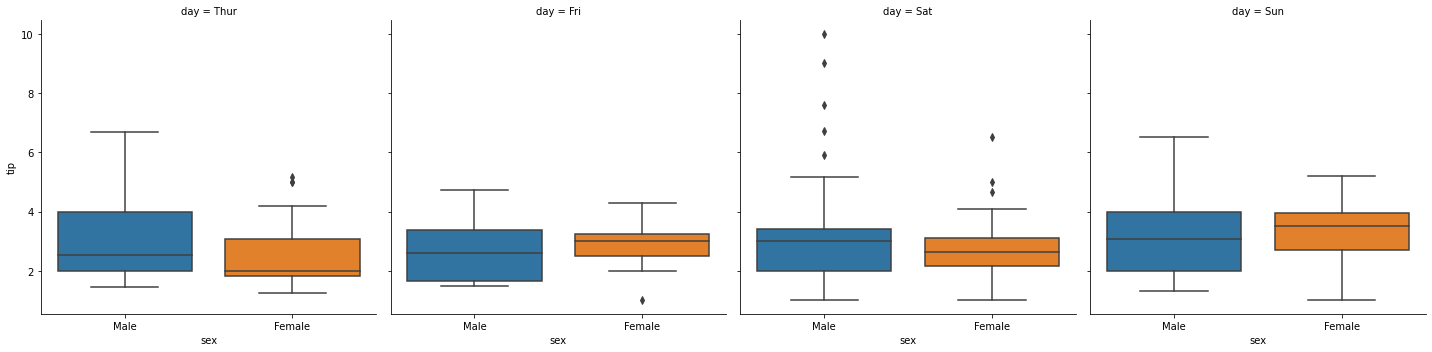

In [75]:
sns.catplot(data=tips, x='sex', y='tip', col='day', kind='box')
plt.show()